In [1]:
import rasterio as rio
import matplotlib.pyplot as plt
import rasterio.warp as warp
import rasterio.plot as rioPlt

In [2]:
import numpy as np

## Example FCC

In [3]:
s1_test = rio.open('/Volumes/ElementsSE/thesisData/FCCbatch_clipped/FCC_Sigma0_HHHV_20190412_clipped.tif')

In [4]:
s1_test.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': None,
 'width': 13516,
 'height': 13820,
 'count': 2,
 'crs': CRS.from_epsg(3413),
 'transform': Affine(10.0, 0.0, -395230.06960777316,
        0.0, -10.0, -2118495.209230866)}

In [5]:
array_firstBand = s1_test.read(1) # band 1: HH, band 2: HV

arr_Nan = array_firstBand.copy()

arr_Nan[arr_Nan == 0] = np.nan

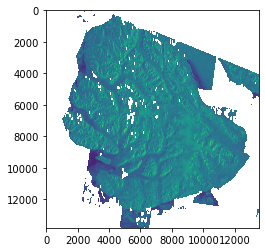

In [8]:
plt.imshow(arr_Nan)

/Users/GalinaJonat/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6619: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/Users/GalinaJonat/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6620: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


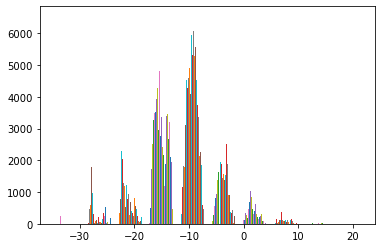

In [9]:
plt.hist(arr_Nan)
plt.show()

In [10]:
#array_band2 = s1_test_test.read(2)

In [11]:
#array_band2[array_band2 == 0] = np.nan

## Examine Snow Probability Mask Original

In [12]:
#s_orig = rio.open('/Volumes/ElementsSE/thesisData/validation/s2Mask/s2Msk_mrg.tif')

In [13]:
#array_orig_firstBand = s_orig.read(1)
#array_orig_firstBand.shape

In [14]:
#plt.imshow(array_orig_firstBand, cmap='pink')


In [15]:
#s_orig.meta

In [16]:
#plt.hist(array_orig_firstBand)
#plt.show()

In [17]:
#np.histogram(array_orig_firstBanday_orig_firstBand)

In [18]:
#np.histogram(array_orig_firstBand, bins=20)

In [19]:
#snwprobMsk = rio.open('/Volumes/ElementsSE/thesisData/validation/s2Mask/s2MskMrg_filtered.tif')

In [20]:
#array_snwprb = snwprobMsk.read(1)
#array_orig_firstBand.shape

In [21]:
#plt.hist(array_snwprb)
#plt.show()

In [22]:
#np.histogram(array_orig_firstBand, bins=20)

## Read Mask

In [23]:
msk33=rio.open('/Volumes/ElementsSE/thesisData/validation/s2Mask/maskBool/aligned_s2Mask.tif')
msk33.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': None,
 'width': 13516,
 'height': 13820,
 'count': 1,
 'crs': CRS.from_epsg(3413),
 'transform': Affine(10.0, 0.0, -395230.06961,
        0.0, -10.0, -2118495.20923)}

In [24]:
a_msk33 = msk33.read(1)

In [25]:
a_mskTest = a_msk33.copy()

In [26]:
np.histogram(a_mskTest)

(array([ 53362780,         0,         0,         0,         0,         0,
                0,         0,         0, 133428340]),
 array([-99999. , -89989.1, -79979.2, -69969.3, -59959.4, -49949.5,
        -39939.6, -29929.7, -19919.8,  -9909.9,    100. ], dtype=float32))

In [27]:
a_mskTest[a_mskTest < -1] = np.nan

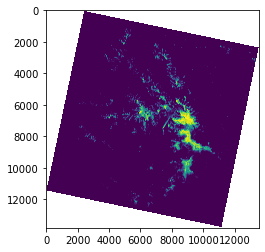

In [28]:
plt.imshow(a_mskTest)

(array([[ 5.,  0.,  0., ...,  0.,  0.,  0.],
        [ 5.,  0.,  0., ...,  0.,  0.,  0.],
        [18.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [17.,  0.,  0., ...,  0.,  0.,  0.],
        [17.,  0.,  0., ...,  0.,  0.,  0.],
        [ 7.,  0.,  0., ...,  0.,  0.,  0.]]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.],
       dtype=float32),
 <a list of 13516 Lists of Patches objects>)

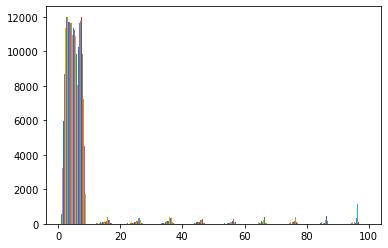

In [29]:
plt.hist(a_mskTest)

In [30]:
plt.show()

In [31]:
nanMask = np.isnan(a_mskTest)

In [32]:
nanMask

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [33]:
a_mskTest[(a_mskTest > -1) & (a_mskTest <= 50)] = 0.0
a_mskTest[(a_mskTest > -1) & (a_mskTest > 50)] = 1.0


/Users/GalinaJonat/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.
/Users/GalinaJonat/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less_equal
  """Entry point for launching an IPython kernel.
/Users/GalinaJonat/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


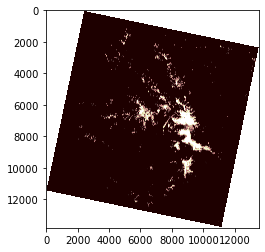

In [34]:
plt.imshow(a_mskTest,cmap='pink')

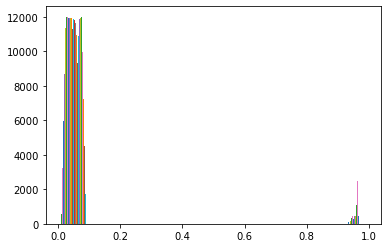

In [35]:
plt.hist(a_mskTest)
plt.show()

In [36]:
mpl = np.multiply(arr_Nan,a_mskTest)

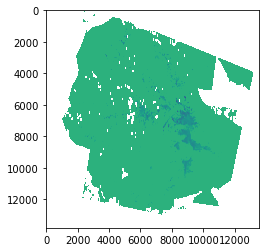

In [37]:
plt.imshow(mpl)

In [39]:
np.histogram(mpl)

ValueError: autodetected range of [nan, nan] is not finite

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-26.993334 , -22.8024   , -18.611467 , -14.420533 , -10.2296   ,
         -6.0386662,  -1.8477328,   2.3432007,   6.5341344,  10.725068 ,
         14.916001 ], dtype=float32),
 <a list of 13516 Lists of Patches objects>)

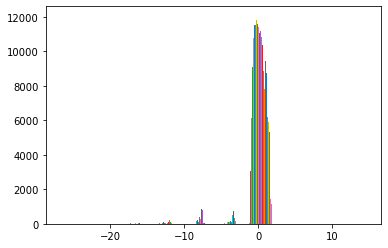

In [40]:
plt.hist(mpl)

In [42]:
mplNoNan = mpl[~np.isnan(mpl)]

In [45]:
mplNoNanNoZero = mplNoNan[mplNoNan != 0]

In [48]:
aprMean = mplNoNanNoZero.mean()
aprSd = mplNoNanNoZero.std()
print('Mean: ' + str(aprMean))
print('Standard dev: ' + str(aprSd))

Mean: -6.896188
Standard dev: 2.9603858


In [50]:
np.median(mplNoNanNoZero)

-6.365686

## Test with different date

In [71]:
s1_May = rio.open('/Volumes/ElementsSE/thesisData/FCCbatch_clipped/FCC_Sigma0_HHHV_20190530_clipped.tif')
s1_May.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': None,
 'width': 13516,
 'height': 13820,
 'count': 2,
 'crs': CRS.from_epsg(3413),
 'transform': Affine(10.0, 0.0, -395233.2025980199,
        0.0, -10.0, -2118492.606755894)}

In [55]:
a_May = s1_May.read(1) # band 1: HH, band 2: HV

a_May[a_May == 0] = np.nan

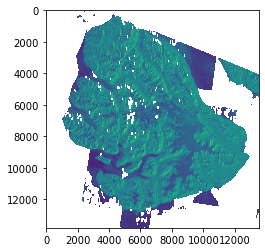

In [56]:
plt.imshow(a_May)

/Users/GalinaJonat/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6619: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/Users/GalinaJonat/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6620: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


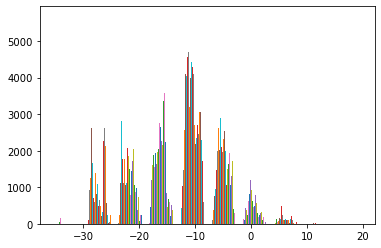

In [57]:
plt.hist(a_May)
plt.show()

In [58]:
mplMay = np.multiply(a_May, a_mskTest)

In [59]:
mplMayNoNan = mplMay[(~np.isnan(mplMay)) & (mplMay !=0)]

In [61]:
mayMean = mplMayNoNan.mean()
maySd = mplMayNoNan.std()
print('Mean: ' + str(mayMean))
print('Standard dev: ' + str(maySd))

Mean: -16.20343
Standard dev: 3.5328338


In [72]:
a_May2 = s1_May.read(2) # band 1: HH, band 2: HV

a_May2[a_May2 == 0] = np.nan

In [73]:
mplMay2 = np.multiply(a_May2, a_mskTest)

In [74]:
mplMay2Val = mplMay2[(~np.isnan(mplMay2)) & (mplMay2 !=0)]

In [75]:
mayMean2 = mplMay2Val.mean()
maySd2 = mplMay2Val.std()
print('Mean: ' + str(mayMean2))
print('Standard dev: ' + str(maySd2))

Mean: -25.810781
Standard dev: 2.8378952


### Second date in April

In [62]:
s1_testApr2 = rio.open('/Volumes/ElementsSE/thesisData/FCCbatch_clipped/FCC_Sigma0_HHHV_20190424_clipped.tif')
s1_testApr2.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': None,
 'width': 13516,
 'height': 13820,
 'count': 2,
 'crs': CRS.from_epsg(3413),
 'transform': Affine(10.0, 0.0, -395235.5773218379,
        0.0, -10.0, -2118491.1509445254)}

In [63]:
a_Apr2 = s1_testApr2.read(1) # band 1: HH, band 2: HV

a_Apr2[a_Apr2 == 0] = np.nan

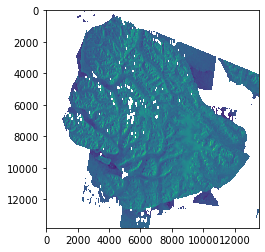

In [64]:
plt.imshow(a_Apr2)

/Users/GalinaJonat/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6619: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/Users/GalinaJonat/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6620: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


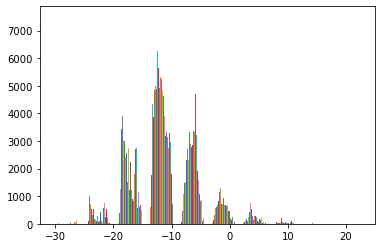

In [65]:
plt.hist(a_Apr22)
plt.show()

In [66]:
mplApr2 = np.multiply(a_Apr2, a_mskTest)
mplAprVal = mplApr2[(~np.isnan(mplApr2)) & (mplApr2 !=0)]

In [67]:
aprMean = mplAprVal.mean()
aprSd = mplAprVal.std()
print('Mean: ' + str(aprMean))
print('Standard dev: ' + str(aprSd))

Mean: -6.848479
Standard dev: 2.9597232


In [68]:
a_Apr2_2 = s1_testApr2.read(2) # band 1: HH, band 2: HV

a_Apr2_2[a_Apr2_2 == 0] = np.nan

In [69]:
mplApr2_2 = np.multiply(a_Apr2_2, a_mskTest)
mplAprVal = mplApr2_2[(~np.isnan(mplApr2_2)) & (mplApr2_2 !=0)]

In [70]:
apr2_2Mean = mplAprVal.mean()
aprSd2_2 = mplAprVal.std()
print('Mean: ' + str(apr2_2Mean))
print('Standard dev: ' + str(aprSd2_2))

Mean: -14.118663
Standard dev: 3.5452244
